## Imports and Loading Data 

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,confusion_matrix, classification_report, roc_curve, auc 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load fraud detection dataset
data = pd.read_csv('../Raw Data /PS_20174392719_1491204439457_log.csv')
data_ = pd.DataFrame(data)
data_.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [2]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Data Cleaning 

In [6]:
# Although the project is not actually in USD, it will be easier to understand the context and understand outliers 
# better by viewing the necessary columns as currency 

data['amount'] = data['amount'].apply(lambda x: f"${x:,.2f}")
data['oldbalanceOrg'] = data['oldbalanceOrg'].apply(lambda x: f"${x:,.2f}")
data['newbalanceOrig'] = data['newbalanceOrig'].apply(lambda x: f"${x:,.2f}")
data['oldbalanceDest'] = data['oldbalanceDest'].apply(lambda x: f"${x:,.2f}")
data['newbalanceDest'] = data['newbalanceDest'].apply(lambda x: f"${x:,.2f}")

In [7]:
# Confirming changes were made to the dataframe 
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"$9,839.64",C1231006815,"$170,136.00","$160,296.36",M1979787155,$0.00,$0.00,0,0
1,1,PAYMENT,"$1,864.28",C1666544295,"$21,249.00","$19,384.72",M2044282225,$0.00,$0.00,0,0
2,1,TRANSFER,$181.00,C1305486145,$181.00,$0.00,C553264065,$0.00,$0.00,1,0
3,1,CASH_OUT,$181.00,C840083671,$181.00,$0.00,C38997010,"$21,182.00",$0.00,1,0
4,1,PAYMENT,"$11,668.14",C2048537720,"$41,554.00","$29,885.86",M1230701703,$0.00,$0.00,0,0
5,1,PAYMENT,"$7,817.71",C90045638,"$53,860.00","$46,042.29",M573487274,$0.00,$0.00,0,0
6,1,PAYMENT,"$7,107.77",C154988899,"$183,195.00","$176,087.23",M408069119,$0.00,$0.00,0,0
7,1,PAYMENT,"$7,861.64",C1912850431,"$176,087.23","$168,225.59",M633326333,$0.00,$0.00,0,0
8,1,PAYMENT,"$4,024.36",C1265012928,"$2,671.00",$0.00,M1176932104,$0.00,$0.00,0,0
9,1,DEBIT,"$5,337.77",C712410124,"$41,720.00","$36,382.23",C195600860,"$41,898.00","$40,348.79",0,0


### Determining Relevant Columns and Sub-groups to minimize less relevant data to the model 

A few other columns that seem relevant to the fraud detection model are the different balance columns that show the transaction amounts in refernce to the original balances. This is helpful in fraud detection because a targeted account would most likely show a large depletion in their account relevant to the balance they currently held in the account already. 

Hypothesized highly relevant columns to the fraud detection model: 
**OldBalanceOrg: The origin accounts balance before the transaction** <br> 

**NewBalanceOrg: The origin accounts balance after the transaction**<br>

The last columns that are most relevant to the model is the destination in which the money is going. There are three columnns that deal with destination of the transaction amount, however it's unclear what the "nameDest" is referencing if only comparing to the original account number. However, if any "Destination"- account appears amongst multiple different "Origins": ['NameOrig'], then it may be an account that commits frequent fraud. The new balance and old balance destination appear to be a good predictor of potential fraud as well. 

In [8]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Key Indicators of Fraud <br>

**Transaction Type:**
- Fraud is mostly found in "TRANSFER" and "CASH_OUT" transactions involving moving money between accounts.
- Transactions like "DEBIT", "PAYMENT", and "CASH_IN" are most likely not malignant.<br>

**Balance Changes:**
- The sender's (NameOrig) OldBalanceOrg is higher, but the NewBalanceOrg is suspiciously 0, meaning they transferred all their funds out
- The receiver's (NameDest) OldBalanceDest is 0 or unusually low, meaning it could be a newly created fraudulent account <br>

**Large Amounts:**
- Fraudulent transactions often involve large amounts being transferred quickly (step)
- The IsFlaggedFraud column may flag a transaction if it exceeds 200,000, but actual fraud can occur below this threshold- it's not clear what currency this is solely from the data so context is important <br>

**Destination Account Behavior:**
- If the destination account (NameDest) is frequently receiving large sums and quickly cashing out, it might be part of a fraud network
- May see the same accounts used multiple times or completely new accounts ($0 balance) to launder money <br>

**Repeated Transactions in a Short Time:**
- If multiple transactions occur within a short time from the same NameOrig, it could indicate an account being drained <br>

In [9]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Check the results
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: Index(['step', 'isFraud', 'isFlaggedFraud'], dtype='object')
Categorical Features: Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


### Initial Data Visualizations to Determine Most Relevant Features 

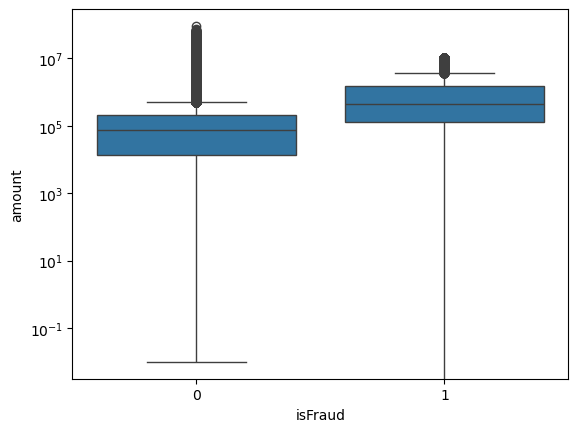

In [4]:
# Bivariate Analysis - Amount vs Fraud (Boxplot using Log scale)
sns.boxplot(x='isFraud', y='amount', data=data)
plt.yscale('log')  
plt.show()


*Class Imbalance:*
It was a bit difficult to truly view the data through box plots with such a large amount of data. This boxplot uses logarithmic scale to view the large amounts of data more clearly. This way, the data is "stretched" and easier to make comparisons. It may be even clearer to use a sample of the data instead as well. 

The boxplot shows a significant number of outliers in the 'Not Fraud' (0) category, which is expected as large legitimate transactions naturally occur. Fraudulent transactions may follow different patterns, which could be explored further

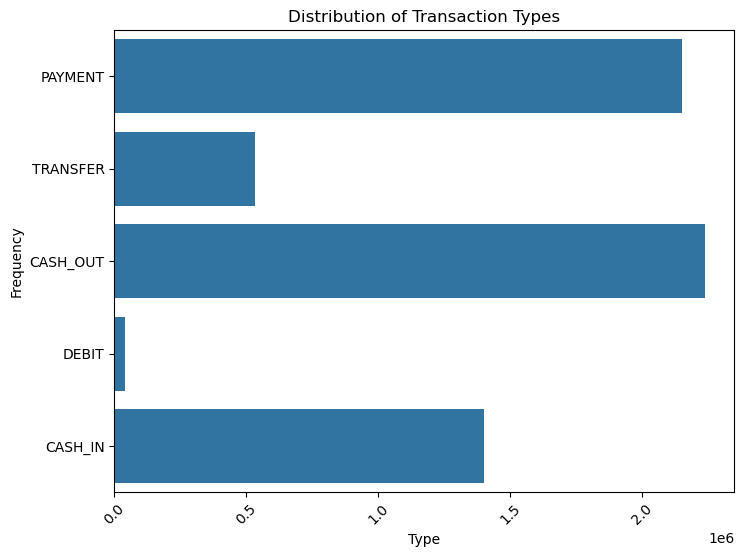

In [5]:

# Univariate Analysis - Distribution of 'type' column
plt.figure(figsize=(8, 6))
sns.countplot(data['type'])
plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




In the graph above, the distribution of transaction types shows the different types of transactions made at each instance. Since this is a fraud detection model, it might not be necessary to take into account a transaction type such as "CASH_IN". A transaction type of adding money into an account very rarely would be fraudulent and even if it were, the transactions that will be most likely to be high predictors of fraud would be high values in 'CASH_OUT' or 'TRANSFER' 

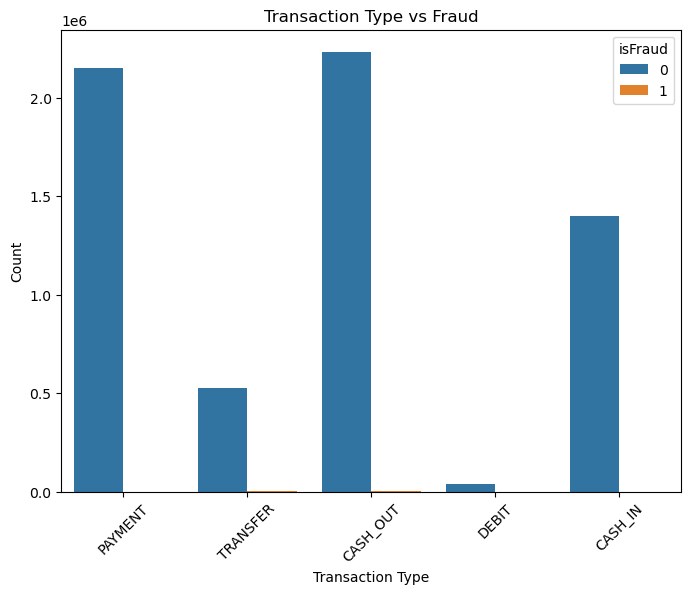

In [12]:
# Bivariate Analysis - Transaction Type vs Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Transaction Type vs Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Although difficult to view due to the large class imbalance between Not Fraud '0' and Fraud '1', it is evident in the above graph that the current markers for Fraud (shown in orange) are generalized in the two transaction types: *TRANSFER* and *CASH_OUT*


#### Potential Columns to Drop: <br>
- [`nameOrig`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A194%2C%22character%22%3A40%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A432%2C%22character%22%3A48%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A922%2C%22character%22%3A44%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A117%2C%22character%22%3A40%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") - Not as useful as [`nameDest`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A124%2C%22character%22%3A14%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A944%2C%22character%22%3A15%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A444%2C%22character%22%3A36%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") for identifying transaction patterns. <br>
- Rows with [`DEBIT`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X54sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A2%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A178%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A766%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1181%2C%22character%22%3A7%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition"), [`CASH_IN`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X54sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A9%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1181%2C%22character%22%3A14%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition"), and [`PAYMENT`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X54sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A101%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A108%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A640%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1181%2C%22character%22%3A23%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") values in the [`type`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X54sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A41%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A117%2C%22character%22%3A21%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A194%2C%22character%22%3A21%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A432%2C%22character%22%3A27%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A922%2C%22character%22%3A22%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1150%2C%22character%22%3A13%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") column - These transaction types are not relevant for fraud detection as fraud is primarily associated with [`TRANSFER`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A73%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A80%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A433%2C%22character%22%3A23%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A668%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A318%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1169%2C%22character%22%3A235%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") and [`CASH_OUT`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A87%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A434%2C%22character%22%3A23%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A94%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A332%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A682%2C%22character%22%3A18%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1169%2C%22character%22%3A250%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition"). <br>
- [`isFlaggedFraud`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A124%2C%22character%22%3A65%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A456%2C%22character%22%3A17%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A944%2C%22character%22%3A64%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") - This column has limited utility as it only flags transactions above a specific threshold, which may not be comprehensive. <br>

#### Proposed New Columns: <br>
- [`step`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X54sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A2%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A117%2C%22character%22%3A11%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A194%2C%22character%22%3A11%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A432%2C%22character%22%3A17%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A922%2C%22character%22%3A12%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1184%2C%22character%22%3A7%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") - Could be useful in a new context, such as identifying time-based patterns in fraudulent activity. <br>
- `transactionDifference` - The difference between [`oldbalanceOrg`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A117%2C%22character%22%3A50%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A432%2C%22character%22%3A58%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A922%2C%22character%22%3A53%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A194%2C%22character%22%3A50%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") and [`newbalanceOrig`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A117%2C%22character%22%3A65%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A194%2C%22character%22%3A65%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A444%2C%22character%22%3A17%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A922%2C%22character%22%3A67%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") to identify anomalies in transaction amounts. <br>
- `balanceDestChange` - The difference between [`oldbalanceDest`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A124%2C%22character%22%3A24%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A944%2C%22character%22%3A24%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A444%2C%22character%22%3A46%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") and [`newbalanceDest`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A124%2C%22character%22%3A40%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A444%2C%22character%22%3A62%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fsa27%2FTLAB_FD%2FTLAB_Fraud_Detect%2FJupyter%20Notebooks%2Ffraud_detect_eda.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A944%2C%22character%22%3A39%7D%7D%5D%2C%22fb307630-26d5-4448-bc9b-5263fd7986c2%22%5D "Go to definition") to track unexpected changes in destination balances. <br>
- `isHighValue` - A binary column indicating whether the transaction amount exceeds a certain threshold, which could help identify high-risk transactions. <br> 

These edits aim to streamline the dataset for fraud detection by focusing on relevant features and removing noise. #Reference: Github Copilot 

In [10]:
# Filter out rows with irrelevant transaction types
data = data[~data['type'].isin(['DEBIT', 'CASH_IN', 'PAYMENT'])]

# New columns
data['transactionDifference'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceDestChange'] = data['newbalanceDest'] - data['oldbalanceDest']
data['isHighValue'] = (data['amount'] > 100000).astype(int)
data['isAccountDrained'] = (data['newbalanceOrig'] == 0).astype(int)
data['isReceiverNew'] = (data['oldbalanceDest'] == 0).astype(int)
data['transactionFrequency'] = data.groupby('nameOrig')['step'].transform('count')
data['isRepeatedReceiver'] = data.groupby('nameDest')['nameDest'].transform('count') >1
data['isLargeAmountFlagged'] = (data['amount'] >= 190000).astype(int)

# Drop old columns that are no longer needed
columns_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = data.drop(columns=columns_to_drop)

type(data)

pandas.core.frame.DataFrame

In [12]:
data.head(20)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,transactionDifference,balanceDestChange,isHighValue,isAccountDrained,isReceiverNew,transactionFrequency,isRepeatedReceiver,isLargeAmountFlagged
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,181.00,0.00,0,1,1,1,True,0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,181.00,-21182.00,0,1,0,1,True,0
15,1,CASH_OUT,229133.94,C905080434,C476402209,0,0,15325.00,46430.44,1,1,0,1,True,1
19,1,TRANSFER,215310.30,C1670993182,C1100439041,0,0,705.00,-22425.00,1,1,0,1,True,1
24,1,TRANSFER,311685.89,C1984094095,C932583850,0,0,10835.00,2712905.89,1,1,0,1,True,1
42,1,CASH_OUT,110414.71,C768216420,C1509514333,0,0,26845.41,-286384.84,1,1,0,1,True,0
47,1,CASH_OUT,56953.90,C1570470538,C824009085,0,0,1942.02,-6146.82,0,1,0,1,True,0
48,1,CASH_OUT,5346.89,C512549200,C248609774,0,0,0.00,5800793.91,0,1,0,1,True,0
51,1,CASH_OUT,23261.30,C2072313080,C2001112025,0,0,20411.53,-25742.00,0,1,0,1,True,0
58,1,TRANSFER,62610.80,C1976401987,C1937962514,0,0,62610.80,7866.29,0,0,0,1,True,0


## Explanation of New Columns:
1. **`transactionDifference`**: Helps identify if the sender transferred all their funds, which is a common fraud indicator [Replaces OldbalanceOrg & newbalanceOrg]
2. **`balanceDestChange`**: Tracks changes in the receiver's balance to detect unusual behavior [Replaces OldbalanceDest & newbalanceDest]
3. **`isHighValue`**: Flags high-value transactions that may be high-risk.
4. **`isAccountDrained`**: Identifies accounts that are completely drained after a transaction.
5. **`isReceiverNew`**: Flags transactions where the receiver's account is new or has no prior balance.
6. **`transactionFrequency`**: Detects repeated transactions from the same sender in a short time, which could indicate account draining.
7. **`isRepeatedReceiver`**: Flags receivers that are frequently used, which could indicate a fraud network.
8. **`isLargeAmountFlagged`**: Flags transactions close to the fraud threshold (e.g., 200,000), even if they are not explicitly flagged.



##  Downsampling and SMOTE
#### Taking a smaller sample of the whole dataset to get a better picture of the data with limited outliers and dealing with class imbalance

In [7]:
# Sample a portion of the data

#print(data[pairplot_columns].head(50))
data_sampled = data.sample(frac=0.1, random_state=100)

print(data['isFraud'])
print(type(data['isFraud']))


2          1
3          1
15         0
19         0
24         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 2770409, dtype: int64
<class 'pandas.core.series.Series'>


In [8]:
# Here I was having difficulties because the sample I created wasn't showing up as a pandas dataframe with each column as a series. Instead, the columns were also dataframes which I have  resolved
# 
print(type(data_sampled['isFraud']))  


<class 'pandas.core.series.Series'>


In [9]:
print(data_sampled['isFraud'].dtype)   


int64


In [13]:
data['isFraud'].value_counts()


isFraud
0    2762196
1       8213
Name: count, dtype: int64

In [14]:
data['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.703546
1     0.296454
Name: proportion, dtype: float64

In the two cells above, it's a bit more clear to view the imbalance between the two classes. This makes sense, as we can imagine that the baseline of fraud detection would be that a transaction is flagged as "Not Fraud", which is classified as 0.  

In order to deal with this issue, we can use Synthetic Minority Over-sampling Technique (SMOTE) to address the issue of the minority class. 


## 